In [115]:
import os

import gdown
import torch
from detecto.core import Model
from detecto import visualize
from PIL import Image
import numpy as np
import os

In [117]:
os.listdir("../outputs")

[]

In [9]:
url = "https://drive.google.com/drive/folders/1ImIDSw_GMuBbyJl7lBq51nGSR-cFy7Mk?usp=drive_link"
_ = gdown.download_folder(url, remaining_ok=True, quiet=True, output='../data')

In [87]:
model_path = "../models/model.pth"
model = Model.load(model_path, ['maseczka'])

G:\Miniforge\envs\detecto\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
G:\Miniforge\envs\detecto\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [88]:
image_uri = "../data/Test/test2.jpg"

In [118]:
img = Image.open(image_uri)
img

In [122]:
predictions = model.predict(img)

In [125]:
def filter_predictions(labels, boxes, scores, threshold = 0.6):
    filter_mask = scores >= threshold
    filtered_boxes = boxes[filter_mask]
    filtered_scores = scores[filter_mask]
    
    indices = torch.where(filter_mask)[0]
    filtered_labels = [labels[i] for i in indices]
    
    return filtered_labels, filtered_boxes, filtered_scores

labels, boxes, scores = filter_predictions(*predictions, threshold=0.6)

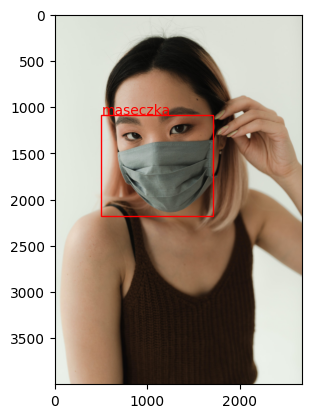

In [178]:
visualize.show_labeled_image(img, boxes, labels)

In [179]:
from matplotlib import pyplot as plt

plt.show()

In [168]:
preds = []
for label, box, score in zip(labels, boxes, scores):
    pred = {
        "label": label,
        "bbox": box.numpy().tolist(),
        "score": score.numpy().tolist()
    }
    preds.append(pred)

In [169]:
import json

In [170]:
json.dumps(preds)

'[{"label": "maseczka", "bbox": [500.23406982421875, 1080.7227783203125, 1707.871826171875, 2180.11474609375], "score": 0.6132333874702454}]'